In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from datetime import datetime
import datetime
import pandas_datareader.data as web

In [2]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 6)
btc = web.DataReader('BTC-USD','yahoo', start, end)

In [3]:
btc = btc[~btc.index.duplicated(keep='first')]

In [4]:
btc = btc.drop(columns=['High','Low','Open','Close','Volume'])

In [5]:
btc.columns = ['Price']

In [6]:
btc = btc.reset_index()

In [7]:
r = pd.date_range(start=btc.Date.min(), end=btc.Date.max())
btc = btc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [8]:
btc['Date'] = pd.to_datetime(btc['Date'])
btc.set_index('Date',inplace=True)

In [9]:
btc = btc.fillna(method='ffill')
btc = btc.fillna(method='bfill')

In [10]:
btc = btc.loc['2019-09-27':'2020-10-06']

In [11]:
start = datetime.datetime(2019, 9, 27)
end = datetime.datetime(2020, 10, 6)
sc = web.DataReader('SC-USD','yahoo', start, end)

In [12]:
sc = sc.loc['2019-09-27':'2020-10-06']

In [13]:
sc = sc[~sc.index.duplicated(keep='first')]

In [14]:
sc = sc.drop(columns=['High','Low','Open','Close','Volume'])

In [15]:
sc.columns = ['Price']

In [16]:
sc = sc.reset_index()

In [17]:
r = pd.date_range(start=sc.Date.min(), end=sc.Date.max())
sc = sc.set_index('Date').reindex(r).rename_axis('Date').reset_index()

In [18]:
sc['Date'] = pd.to_datetime(sc['Date'])
sc.set_index('Date',inplace=True)

In [19]:
sc = sc.fillna(method='ffill')
sc = sc.fillna(method='bfill')

In [20]:
frames = [btc,sc]

In [21]:
btc_sc = pd.concat(frames,sort=False,axis=1)

In [22]:
btc_sc.columns = ['BTC','SC']

In [37]:
x = btc_sc.iloc[:,:-1].values
y = btc_sc.iloc[:,-1].values

In [38]:
y = y.reshape(len(y),1)

In [39]:
from sklearn.preprocessing import StandardScaler
ss_x = StandardScaler()
ss_y = StandardScaler()
x = ss_x.fit_transform(x)
y = ss_y.fit_transform(y)

In [40]:
from sklearn.svm import SVR
regressor = SVR(kernel = 'rbf')
regressor.fit(x, y.ravel())

SVR(C=1.0, cache_size=200, coef0=0.0, degree=3, epsilon=0.1, gamma='scale',
    kernel='rbf', max_iter=-1, shrinking=True, tol=0.001, verbose=False)

In [42]:
ss_y.inverse_transform(regressor.predict(ss_x.transform([[10630]])))

array([0.0029])

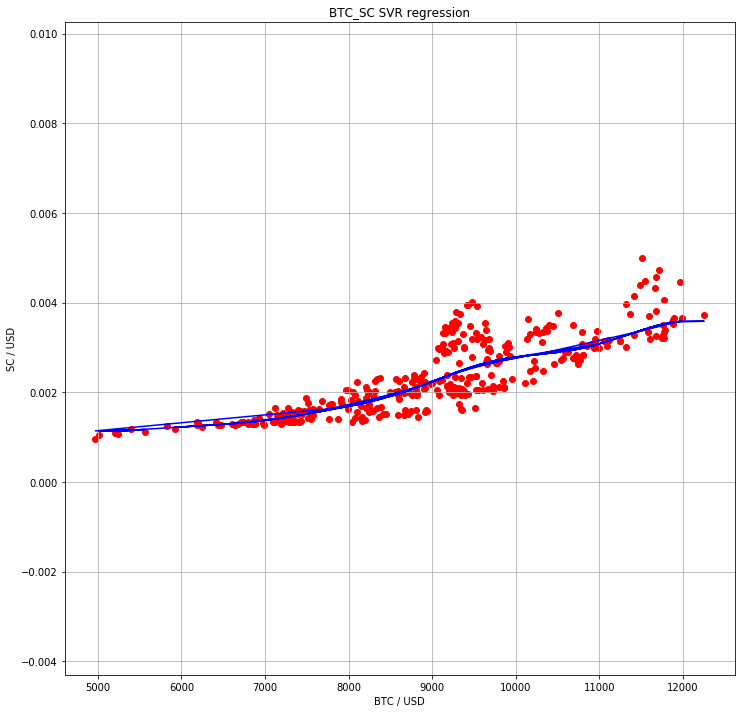

In [43]:
plt.figure(figsize=(12,12))
plt.grid()
plt.scatter(ss_x.inverse_transform(x), ss_y.inverse_transform(y), color='red')
plt.plot(ss_x.inverse_transform(x), ss_y.inverse_transform(regressor.predict(x)),color='blue')
plt.title('BTC_SC SVR regression')
plt.xlabel('BTC / USD')
plt.ylabel('SC / USD')
plt.show()

In [36]:
from sklearn.metrics import r2_score
r2_score(y_test, y_pred)

0.7978749824516713